# 6.4 Spark编程


## （1）导入pyspark包

In [1]:
# pip install pyspark.
# 从spark.sql模块中导入SparkSession.
from pyspark.sql import SparkSession


## （2）创建SparkSession会话

In [2]:
spark = SparkSession.builder\
    .appName('My_App')\
    .master('local')\
    .getOrCreate()

## （3）读入数据，创建Spark数据框

In [3]:
df = spark.read.csv('flights.csv', header=True)

## （4）显示DataFrame的模式信息

In [4]:
df.printSchema()

root
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- dep_time: string (nullable = true)
 |-- dep_delay: string (nullable = true)
 |-- arr_time: string (nullable = true)
 |-- arr_delay: string (nullable = true)
 |-- carrier: string (nullable = true)
 |-- tailnum: string (nullable = true)
 |-- flight: string (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- air_time: string (nullable = true)
 |-- distance: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- minute: string (nullable = true)



## （5）缓存DataFrame

In [5]:
df.cache()

DataFrame[year: string, month: string, day: string, dep_time: string, dep_delay: string, arr_time: string, arr_delay: string, carrier: string, tailnum: string, flight: string, origin: string, dest: string, air_time: string, distance: string, hour: string, minute: string]

## （6）显示DataFrame的内容

In [6]:
df.show(5)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|    1|  1|       1|       96|     235|       70|     AS| N508AS|   145|   PDX| ANC|     194|    1542|   0|     1|
|2014|    1|  1|       4|       -6|     738|      -23|     US| N195UW|  1830|   SEA| CLT|     252|    2279|   0|     4|
|2014|    1|  1|       8|       13|     548|       -4|     UA| N37422|  1609|   PDX| IAH|     201|    1825|   0|     8|
|2014|    1|  1|      28|       -2|     800|      -23|     US| N547UW|   466|   PDX| CLT|     251|    2282|   0|    28|
|2014|    1|  1|      34|       44|     325|       43|     AS| N762AS|   121|   SEA| ANC|     201|    1448|   0|    34|
+----+-----+---+--------+---------+-----

## （7）显示DataFrame的列名

In [7]:
df.columns

['year',
 'month',
 'day',
 'dep_time',
 'dep_delay',
 'arr_time',
 'arr_delay',
 'carrier',
 'tailnum',
 'flight',
 'origin',
 'dest',
 'air_time',
 'distance',
 'hour',
 'minute']

## （8）统计DataFrame的行数

In [8]:
df.count()

52535

## （9）选择数据框的特定列

In [9]:

spark_df_flights_selected = df.select(df['tailnum'], df['flight'],
                                      df['dest'], df['arr_delay'],
                                      df['dep_delay'])

spark_df_flights_selected.show(3)

+-------+------+----+---------+---------+
|tailnum|flight|dest|arr_delay|dep_delay|
+-------+------+----+---------+---------+
| N508AS|   145| ANC|       70|       96|
| N195UW|  1830| CLT|      -23|       -6|
| N37422|  1609| IAH|       -4|       13|
+-------+------+----+---------+---------+
only showing top 3 rows



## （10）注册DataFrame为临时视图

In [10]:
df.createTempView('flights_view')

## （11）编写并执行SQL语句

In [11]:

sql_str = 'select dest, arr_delay from flights_view'

spark_destDF = spark.sql(sql_str)

spark_destDF.show(3)

+----+---------+
|dest|arr_delay|
+----+---------+
| ANC|       70|
| CLT|      -23|
| IAH|       -4|
+----+---------+
only showing top 3 rows



## （12）将Spark SQl结果写入硬盘

In [12]:
# DataFrame对象的write.csv方法将数据框保存为csv文件
# 此处会新建一个Output_spark_destDF目录，
# 并在其下存储csv文件， 类似HDFS的存储
#spark_destDF.write.csv('Output_spark_destDF1')#运行一次

## （13）读取已保存的Spark SQl语句结果

In [13]:
dfnew = spark.read.csv('Output_spark_destDF1/part-00000-3896a94f-6c56-45d8-a259-cb70d2b1da3c-c000.csv')


dfnew.show(3)

+---+---+
|_c0|_c1|
+---+---+
|ANC| 70|
|CLT|-23|
|IAH| -4|
+---+---+
only showing top 3 rows



## （14）过滤DataFrame的行

In [14]:
jfkDF = df.filter(df['dest'] == 'JFK')
jfkDF.show(3)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|    1|  1|     654|       -6|    1455|      -10|     DL| N686DA|   418|   SEA| JFK|     273|    2422|   6|    54|
|2014|    1|  1|     708|       -7|    1510|      -19|     AA| N3DNAA|   236|   SEA| JFK|     281|    2422|   7|     8|
|2014|    1|  1|     708|       -2|    1453|      -20|     DL| N3772H|  2258|   PDX| JFK|     267|    2454|   7|     8|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
only showing top 3 rows



## （15）分组统计Spark数据框

In [15]:

dailyDelayDF = df.groupBy(df.day)\
                 .agg({'dep_delay': 'mean', 'arr_delay':'mean'})


dailyDelayDF.show()

dailyDelayDF.printSchema()

+---+--------------------+------------------+
|day|      avg(arr_delay)|    avg(dep_delay)|
+---+--------------------+------------------+
|  7|0.025215252152521524| 5.243243243243243|
| 15|  1.0819155639571518| 4.818353236957888|
| 11|   5.749170537491706| 7.250661375661376|
| 29|   6.407451923076923| 11.32174955062912|
|  3|   5.629350893697084|11.526241799437676|
| 30|   9.433526011560694| 12.31663788140472|
|  8|    0.52455919395466| 4.555904522613066|
| 22| -1.0817571690054912|  6.10231425091352|
| 28| -3.4050632911392404| 4.110270951480781|
| 16| 0.31582125603864736|4.2917420132610005|
|  5|    4.42015503875969| 8.219989696032973|
| 31|   5.796638655462185| 6.382229673093042|
| 18|  -0.235370611183355|3.0194931773879143|
| 27|  -4.354777070063694| 4.864126984126984|
| 17|  1.8664688427299703| 5.873815165876778|
| 26| -1.5248683440608544| 4.833430742255991|
|  6|  3.1785932721712538| 7.075045759609518|
| 19|  2.8462462462462463| 7.208383233532934|
| 23|   2.352836879432624| 6.30710

## （16）重命名DataFrame数据框

In [16]:
dailyDelayDF = dailyDelayDF.withColumnRenamed('avg(arr_delay)', 'avg_arr_delay')
dailyDelayDF = dailyDelayDF.withColumnRenamed('avg(dep_delay)', 'avg_dep_delay')
dailyDelayDF.printSchema()

root
 |-- day: string (nullable = true)
 |-- avg_arr_delay: double (nullable = true)
 |-- avg_dep_delay: double (nullable = true)



## （17）将数据转换为本地数据框

In [17]:

local_dailyDelay = dailyDelayDF.toPandas()

local_dailyDelay.head(10)

,day,avg_arr_delay,avg_dep_delay
0,7,0.025215,5.243243
1,15,1.081916,4.818353
2,11,5.749171,7.250661
3,29,6.407452,11.321750
4,3,5.629351,11.526242
5,30,9.433526,12.316638
6,8,0.524559,4.555905
7,22,-1.081757,6.102314
8,28,-3.405063,4.110271
9,16,0.315821,4.291742


## （18）结果的可视化

Text(0,0.5,'起飞延误时间')

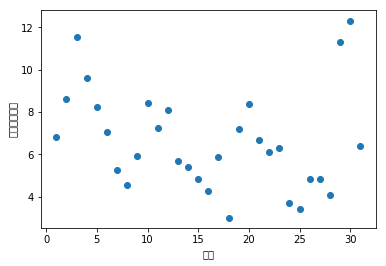

In [18]:

%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(local_dailyDelay.day.values.astype('i8'),
            local_dailyDelay.avg_dep_delay.astype('f8'))

plt.xlabel('日期')
plt.ylabel('起飞延误时间')

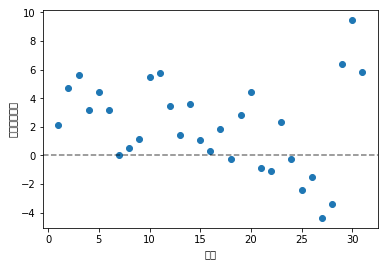

In [19]:
plt.scatter(local_dailyDelay.day.values.astype('i8'),
            local_dailyDelay.avg_arr_delay.values.astype('f8'))

plt.xlabel('日期')
plt.ylabel('到达延误时间')

plt.axhline(0, color='black', linestyle='--', alpha=0.5)

## （18）关闭SparkSession会话

In [20]:
spark.stop()